In [1]:
# to handle datasets
import pandas as pd
from pandas import DataFrame
import numpy as np

# handle simple warnings
# import warnings
# warnings.simplefilter(action='ignore')
# I want t see warnings


# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to see all dataframe columns
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
ffmlDf = pd.read_csv('ffmlDf_20-21')

In [3]:
ffmlDf.head()
# use this to see if there are any columns that don't provide value
# index's do not provide value

,Unnamed: 0,Unnamed: 0.1,points,minsPlayed,goalsScored,assists,cleanSheets,goalsConceded,ownGoals,penSaved,penMissed,yelCards,redCards,saves,bonus,bonusPointSystem,influence,creativity,threat,ictIndex,netTransfers,selectedBy,costGBP,gameDate,playerName,oppositionTeam
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,76656,7.0,2020-09-12,"('Mesut', 'Özil')",Fulham
1,1,8170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,5313,4.5,2020-09-12,"('Mark', 'Gillespie')",West Ham United
2,2,8190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,2064,5.0,2020-09-12,"('Jacob', 'Murphy')",West Ham United
3,3,8210,8,84,1,0,1,0,0,0,0,0,0,0,2,32,32.0,23.3,50.0,10.5,0,538610,6.5,2020-09-12,"('Callum', 'Wilson')",West Ham United
4,4,8230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,65008,6.0,2020-09-12,"('Ryan', 'Fraser')",West Ham United


In [4]:
print(ffmlDf.shape)
# drop 'unnamed: 0' as it is an index
ffmlDf = ffmlDf.drop(columns=['Unnamed: 0'])
ffmlDf = ffmlDf.drop(columns=['Unnamed: 0.1'])

(11679, 26)


In [5]:
ffmlDf.shape

(11679, 24)

In [6]:
# missing values
# if a column has one or more missing values within it
vars_with_na = [var for var in ffmlDf.columns if ffmlDf[var].isnull().sum() > 0]

ffmlDf[vars_with_na].isnull().mean()
# there are no null values

# to verify run:
# print(len(vars_with_na))

Series([], dtype: float64)

In [7]:
# what happens if I remove all data where mins played == 0

In [8]:
# remove zerominsplayed

def RemoveZeroMinsPlayed(df):
    df = df.copy().where(df['minsPlayed'] != 0)
    df.dropna(axis=0, inplace=True)
    return df

zero_mins_played = RemoveZeroMinsPlayed(ffmlDf)
zero_mins_played
# now repeat the actions to view the cont and disc distibutions

,points,minsPlayed,goalsScored,assists,cleanSheets,goalsConceded,ownGoals,penSaved,penMissed,yelCards,redCards,saves,bonus,bonusPointSystem,influence,creativity,threat,ictIndex,netTransfers,selectedBy,costGBP,gameDate,playerName,oppositionTeam
3,8.0,84.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,32.0,32.0,23.3,50.0,10.5,0.0,538610.0,6.5,2020-09-12,"('Callum', 'Wilson')",West Ham United
5,7.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,19.4,39.8,0.0,5.9,0.0,76806.0,4.5,2020-09-12,"('Jamal', 'Lewis')",West Ham United
7,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,2.0,0.4,0.0,87664.0,5.5,2020-09-12,"('Shane', 'Long')",Crystal Palace
8,2.0,90.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,16.8,18.5,2.0,3.7,0.0,87171.0,5.0,2020-09-12,"('Ryan', 'Bertrand')",Crystal Palace
9,2.0,90.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17.0,22.6,0.0,0.0,2.3,0.0,1400435.0,4.5,2020-09-12,"('Alex', 'McCarthy')",Crystal Palace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11270,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11161.0,4.5,2021-01-26,"('Jairo', 'Riedewald')",West Ham United
11276,2.0,90.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.4,10.2,0.0,1.3,307.0,454.0,4.5,2021-01-26,"('Ibrahima', 'Diallo')",Arsenal
11277,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,2021-01-26,"('Daniel', ""N'Lundulu"")",Arsenal
11289,1.0,90.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,8.8,1.3,0.0,1.0,0.0,196908.0,4.5,2021-01-26,"('Jan', 'Bednarek')",Arsenal


In [9]:
# move forward with zero mins played as the main df
# players who do not play a match offer no useful information
# for the model
ffmlDf = zero_mins_played

In [10]:
# group numerical variables

num_vars = [var for var in ffmlDf.columns if ffmlDf[var].dtypes != 'O']

print(len(num_vars),'out of',len(ffmlDf.columns),'are numerical variables')
num_vars

21 out of 24 are numerical variables


['points',
 'minsPlayed',
 'goalsScored',
 'assists',
 'cleanSheets',
 'goalsConceded',
 'ownGoals',
 'penSaved',
 'penMissed',
 'yelCards',
 'redCards',
 'saves',
 'bonus',
 'bonusPointSystem',
 'influence',
 'creativity',
 'threat',
 'ictIndex',
 'netTransfers',
 'selectedBy',
 'costGBP']

In [11]:
# separate discrete and continuous numerical variables for further analysis
# dicrete and continuous normally separated by unique values
for var in num_vars:
    print(var,':',ffmlDf[var].nunique())
    
# discrete_vars: variables that are counted
# continuous_vars: variables that are measured

points : 27
minsPlayed : 89
goalsScored : 5
assists : 5
cleanSheets : 2
goalsConceded : 8
ownGoals : 2
penSaved : 2
penMissed : 2
yelCards : 2
redCards : 2
saves : 11
bonus : 4
bonusPointSystem : 48
influence : 149
creativity : 149
threat : 53
ictIndex : 94
netTransfers : 113
selectedBy : 444
costGBP : 16


In [12]:
# get discrete vars

discrete_vars = [
    var for var in num_vars
    if ffmlDf[var].nunique() < 15 or var == 'minsPlayed'
]
discrete_vars

['minsPlayed',
 'goalsScored',
 'assists',
 'cleanSheets',
 'goalsConceded',
 'ownGoals',
 'penSaved',
 'penMissed',
 'yelCards',
 'redCards',
 'saves',
 'bonus']

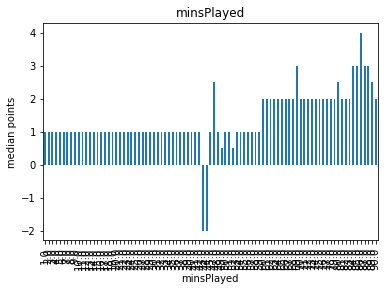

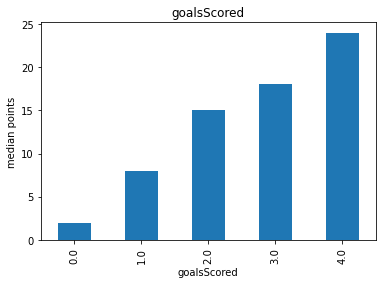

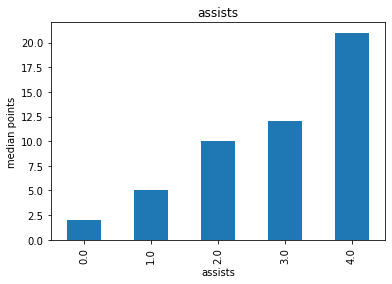

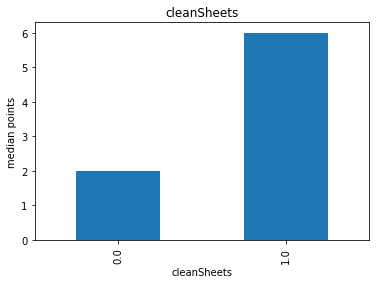

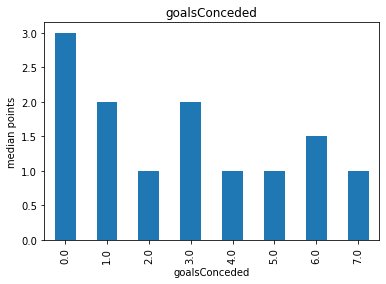

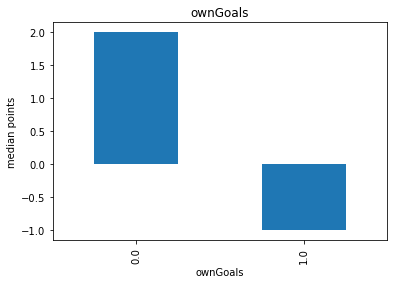

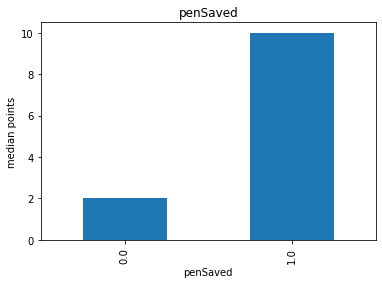

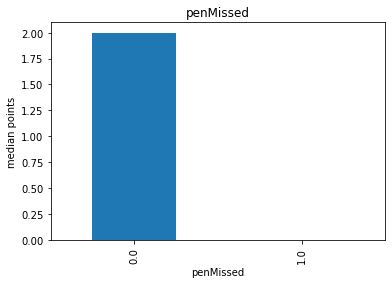

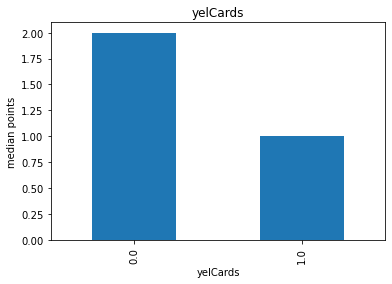

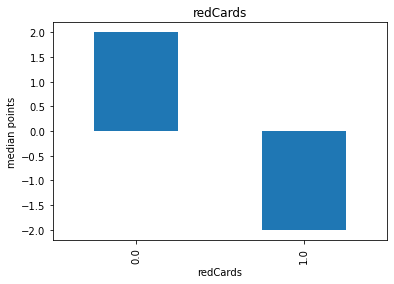

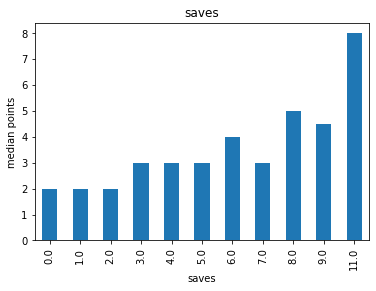

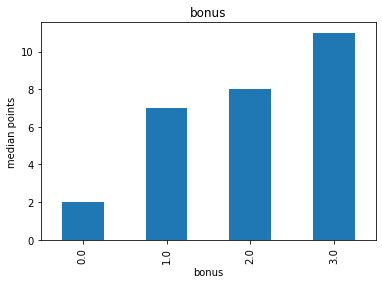

In [13]:
# plot num_vars as a bar (good for discrete)

def BarPlotNumVars(var, df):
    df = df.copy()
    df.groupby(var)['points'].median().plot.bar()
    plt.title(var)
    plt.ylabel('median points')
    plt.show()

for var in discrete_vars:
    BarPlotNumVars(var, ffmlDf)


In [14]:
# get continuous vars

continuous_vars = [
    var for var in num_vars
    if var not in discrete_vars
]
continuous_vars

['points',
 'bonusPointSystem',
 'influence',
 'creativity',
 'threat',
 'ictIndex',
 'netTransfers',
 'selectedBy',
 'costGBP']

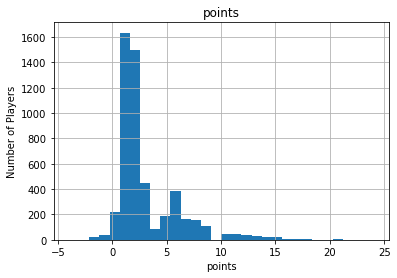

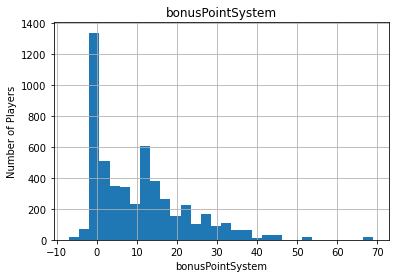

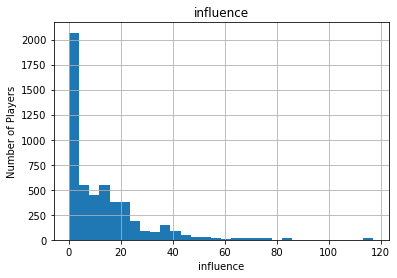

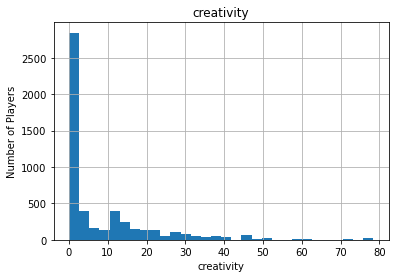

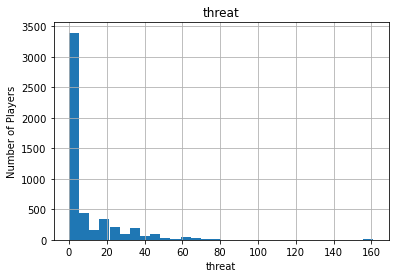

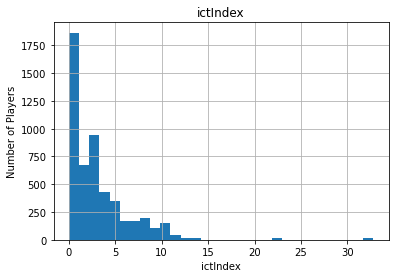

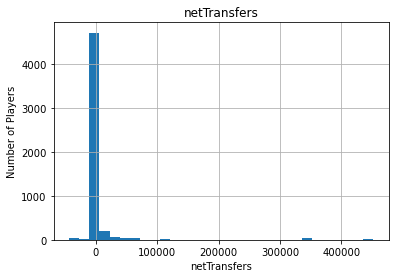

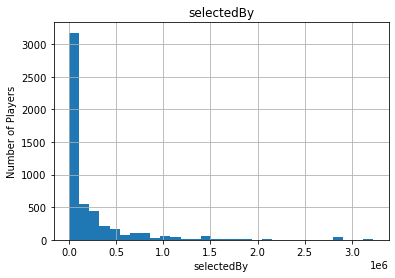

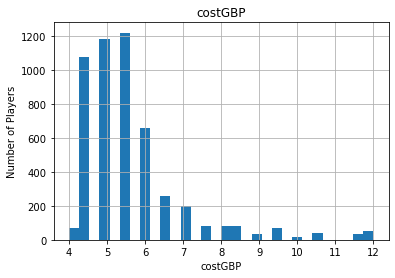

In [15]:
# plot num_vars as hist (good for continuous)

def HistPlotNumVars(var, df):
    df = df.copy()
    df[var].hist(bins=30)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Number of Players')
    plt.show()

for var in continuous_vars:
    HistPlotNumVars(var, ffmlDf)


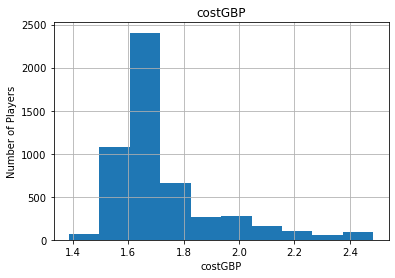

In [16]:
# if we transform the df do we get a more normal distribution
# for our histograms

def LogTranformContinuous(var, df):
    df = df.copy() # protects original dataframe
    
    # values <= 0 - cant be transformed
    if any(ffmlDf[var] <= 0):
        pass
    else:
        # log transform the var
        df[var] = np.log(df[var])
        df[var].hist(bins=10)
        plt.title(var)
        plt.xlabel(var)
        plt.ylabel('Number of Players')
        plt.show()

for var in continuous_vars:
    LogTranformContinuous(var, ffmlDf)


### didn't work out as I had hoped so let us not move forward with the transformed variables
- not all continuous vars where transformed!
- and the transformed costGBP was still skewed to the left

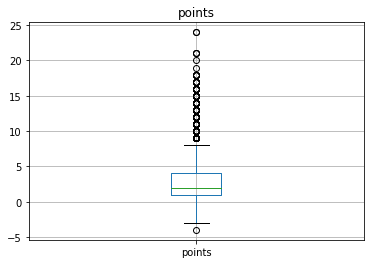

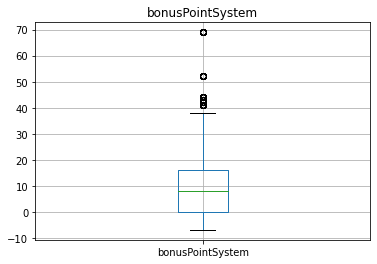

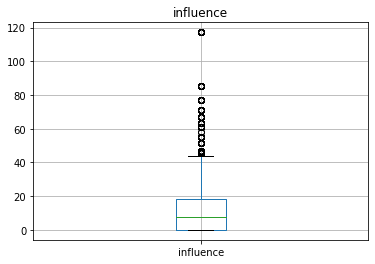

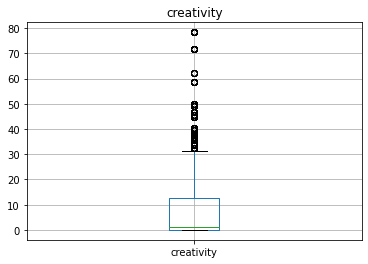

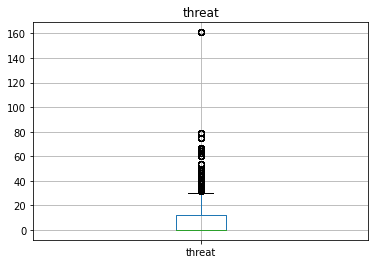

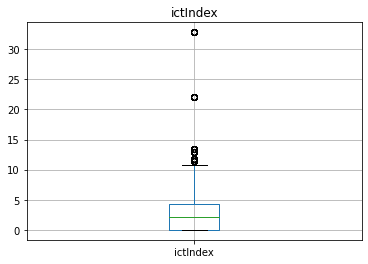

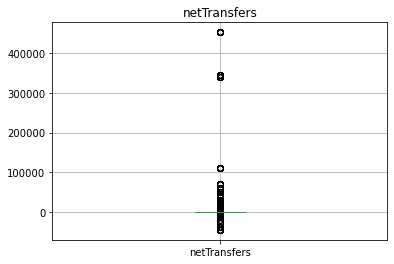

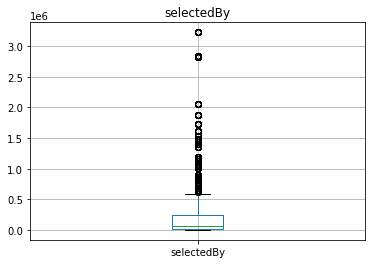

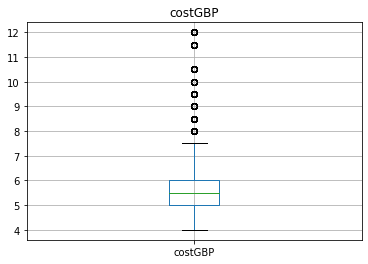

In [17]:
# outliers extreme values can affect the performance of linear models
# Boxplots let us spot outliers more easily

def BoxPlotContinuousVar(var, df):
    df = df.copy()
    df.boxplot(column=var)
    plt.title(var)
    plt.show()
    
for var in continuous_vars:
    BoxPlotContinuousVar(var, ffmlDf)


##### it appears that players:
- performing well
- that are too expensive
##### are outliers

In [18]:
ffmlDf.head()

,points,minsPlayed,goalsScored,assists,cleanSheets,goalsConceded,ownGoals,penSaved,penMissed,yelCards,redCards,saves,bonus,bonusPointSystem,influence,creativity,threat,ictIndex,netTransfers,selectedBy,costGBP,gameDate,playerName,oppositionTeam
3,8.0,84.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,32.0,32.0,23.3,50.0,10.5,0.0,538610.0,6.5,2020-09-12,"('Callum', 'Wilson')",West Ham United
5,7.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,31.0,19.4,39.8,0.0,5.9,0.0,76806.0,4.5,2020-09-12,"('Jamal', 'Lewis')",West Ham United
7,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,2.0,0.4,0.0,87664.0,5.5,2020-09-12,"('Shane', 'Long')",Crystal Palace
8,2.0,90.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,16.8,18.5,2.0,3.7,0.0,87171.0,5.0,2020-09-12,"('Ryan', 'Bertrand')",Crystal Palace
9,2.0,90.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,17.0,22.6,0.0,0.0,2.3,0.0,1400435.0,4.5,2020-09-12,"('Alex', 'McCarthy')",Crystal Palace


In [19]:
# plot the spread of points each player has gotten so far

def PlotPlayer(df, player):
    df = df.copy()
    df.groupby('playerName').plot.line(x='gameDate', y='points')
    plt.title(player)
    plt.show()


# couldnt seem to get the graphs to load in a scrollable format
# couldn't set the title to show for each graph
# best not to run this as it greatly increases the length and size
# of the jupyter notebook
for player in ffmlDf['playerName'].unique():
    #PlotPlayer(ffmlDf, player)
    break


In [20]:
# group the categorical variable
cat_vars = [
    var for var in ffmlDf.columns
    if ffmlDf[var].dtypes == 'O'
    ]

print(len(cat_vars),'out of',len(ffmlDf.columns),'are categorical variables')
cat_vars

3 out of 24 are categorical variables


['gameDate', 'playerName', 'oppositionTeam']

In [21]:
for var in cat_vars:
    print( var+': has', ffmlDf[var].nunique(), 'unique values')

gameDate: has 64 unique values
playerName: has 471 unique values
oppositionTeam: has 20 unique values


In [22]:
# the gameDate does not appear to offer any real value here
# so i will look to drop it
# oppositionTeam could help with predictions... maybe

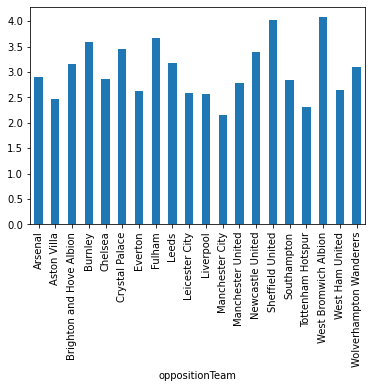

In [23]:
def OppTeamBarPlot(df):
    df = df.copy()
    df.groupby('oppositionTeam')['points'].mean().plot.bar()
    plt.show()

OppTeamBarPlot(ffmlDf)

In [24]:
# the two worst teams in the prem have now been identified
# the next stage will be the feature engineering where we create
# the Test and Train datasets